In [1]:
#Importing Libraries
import numpy as np
import pandas as pd

# importing plotting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#impoting seaborn for statistical plots
import seaborn as sns

#Breaking into test set and Training set
from sklearn.model_selection import train_test_split

#importing os, sys for statistic
from scipy import stats

#calculating accuracy measure and confusion matrix
from sklearn import metrics

In [2]:
#Read the data as dataframe
df = pd.read_csv("bank-full.csv")
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
#BASIC EDA

In [4]:
# 3(A) SHAPE OF THE DATA
df.shape

(45211, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [6]:
#3 (B) Data type of each attribute
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [7]:
# NOTE - Some Attributes are having object data type and some are having integer data type.
#Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types

In [8]:
# 3 (C) Checking the presence of missing values
val = df.isnull().values.any()
if val == True :
    print("Missing values present : ", df.isnull().values.sum() )
    df = df.dropna()
else:
    print("No missing values Present")
        

No missing values Present


In [9]:
# Checking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
# FINDING UNIQUE DATA
df.apply(lambda x: len(x.unique()))

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [11]:
print('Jobs:\n' ,df['job'].unique())
print('Marital:\n',df['marital'].unique())
print('Default:\n',df['default'].unique())
print('Education:\n',df['education'].unique())
print('Housing:\n',df['housing'].unique())
print('Loan:\n',df['loan'].unique())
print('Contact:\n',df['contact'].unique())
print('Month:\n',df['month'].unique())
print('Day:\n',df['day'].unique())
print('Campaign:\n',df['campaign'].unique())

Jobs:
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:
 ['married' 'single' 'divorced']
Default:
 ['no' 'yes']
Education:
 ['tertiary' 'secondary' 'unknown' 'primary']
Housing:
 ['yes' 'no']
Loan:
 ['no' 'yes']
Contact:
 ['unknown' 'cellular' 'telephone']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Day:
 [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Campaign:
 [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


In [12]:
# Finding Mean
df.mean()

age           40.936210
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64

In [13]:
# Finding Median
df.median()

age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64

In [14]:
# Finding Stadard Deviation
df.std()

age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [15]:
# Measure of Skewness
df.skew(axis = 0, skipna =True)

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

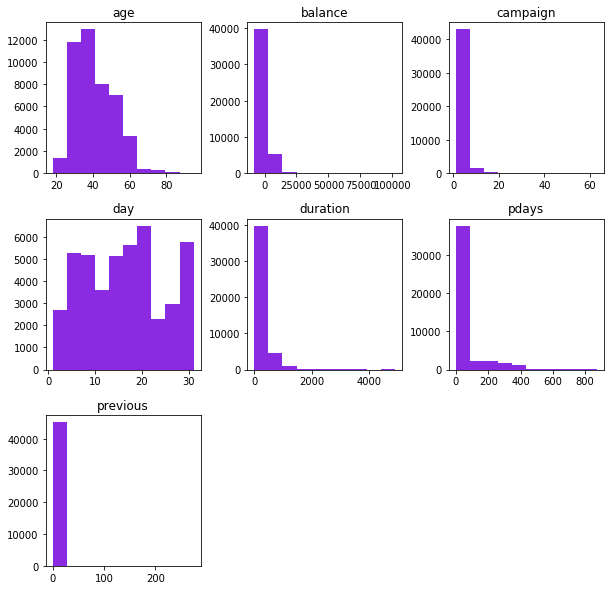

In [16]:
# PLOTTING HISTOGRAM
df.hist(figsize = (10,10), color="blueviolet",grid=False)
plt.show()

In [ ]:
# PLOTTING PAIRPLOT
sns.pairplot(df.iloc[:, 1:])

In [18]:
# CALCULATING THE CORRELATION MATRIX
cor = df.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [ ]:
# HEAT MAP
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
# Prepare the data to train a model – check if data types areappropriate
# Converting catagorical attributes to continuous due the feature scaling will be applied later.

In [21]:
from sklearn.preprocessing import LabelEncoder # Label encoding is simply converting each value in a column to a number
labelencoder_X = LabelEncoder()
df['job']      = labelencoder_X.fit_transform(df['job']) 
df['marital']  = labelencoder_X.fit_transform(df['marital']) 
df['education']= labelencoder_X.fit_transform(df['education']) 
df['default']  = labelencoder_X.fit_transform(df['default']) 
df['housing']  = labelencoder_X.fit_transform(df['housing']) 
df['loan']     = labelencoder_X.fit_transform(df['loan']) 
df['contact']  = labelencoder_X.fit_transform(df['contact']) 
df['month']    = labelencoder_X.fit_transform(df['month'])


# MODEL_1

# GaussianNB model 

In [23]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#for importing rows and column
X = df.iloc[:,0:15].values  ## Features
Y = df.iloc[:,16].values  ## Target.values[:,10]  ## Target



In [24]:

# splitting into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# fitting regression model to the dataset
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
#predicting the test set result
Y_pred = classifier.predict(X_test)

In [26]:
#ACCURACY
NB=accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',NB)

Accuracy_score: 0.852959391312041


In [27]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion_matrix of NB:', cm)

Confusion_matrix of NB: [[9039  939]
 [ 723  602]]


# MODEL_2

# LOGISTIC REGRESSION MODEL 

In [32]:
X = df.iloc[:,0:15].values
Y = df.iloc[:,16].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 15)


In [33]:
type(X_train)

numpy.ndarray

In [35]:
#fitting model to the dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 10)
classifier.fit(X_train, Y_train)

#predicting the test set result
Y_pred = classifier.predict(X_test)

C:\Users\akash tripathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
#ACCURACY
LR = accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:', LR)

Accuracy_score: 0.8902061399628417


In [37]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion_matrix of LR:', cm)

Confusion_matrix of LR: [[9828  192]
 [1049  234]]


#  MODEL 3

#   Random forest model 

In [39]:
# fitting regression model to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , random_state = 0 )
classifier.fit(X_train, Y_train)

#predicting the test set result
Y_pred = classifier.predict(X_test)

In [40]:
#ACCURACY
RFR = accuracy_score(Y_test, Y_pred, normalize = True) #Accuracy of Naive Bayes' Model
print('Accuracy_score:',RFR)

Accuracy_score: 0.8954259930991773


In [47]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print('Confusion_matrix of RFR:', cm)

Confusion_matrix of RFR: [[9710  310]
 [ 872  411]]


# Compare performances of all the model

In [41]:
models = pd.DataFrame({
                'Models': [ 'Gausian NB','Logistic Model', 'Random Forest Classifier'],
                'Score':  [NB, LR, RFR]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,Random Forest Classifier,0.895426
1,Logistic Model,0.890206
0,Gausian NB,0.852959
